In [1]:
%rm -rf stonks/

In [2]:
%%capture
!git clone https://github.com/IS737StockPicker/stonks

In [3]:
import pandas as pd
from datetime import datetime
from datetime import date
stock_data= pd.read_csv('/content/stonks/Stocks_march_sept.csv')
#stock_data['Date'] = stock_data['Date'].dt.date(stock_data['Date'])

stock_data["Date"] = pd.to_datetime(stock_data["Date"], errors='coerce',utc=True)
stock_data['Date'] = stock_data['Date'].dt.strftime('%Y-%m-%d')
stock_data.head()
#stock_data.info()
#stock_data['Date'].day()
#stock_data.dtypes
#stock_data['Date'].astype()

Date  XLE  XLF  XLU  XLI  XLK  XLV  XLY  IYR  AAPL  XLB  XLP  SPY  \
0  2022-03-14    0    0    0    0    0    0    0    0     0    0    0    0   
1  2022-03-15    1    1    1    1    1    1    1    0     1    1    1    1   
2  2022-03-16    0    1    0    1    1    1    1    1     1    1    0    1   
3  2022-03-17    1    1    1    1    1    1    1    1     1    1    1    1   
4  2022-03-18    1    1    0    1    1    1    1    1     1    1    1    1   

   ^DJI  NDX  
0     0  0.0  
1     1  1.0  
2     1  1.0  
3     1  1.0  
4     1  1.0

In [4]:
Guardian_Data= pd.read_csv('/content/stonks/guardian_data.csv')
Guardian_Data.head()

Date  Headline Mean  Body Mean  Headline Median  Body Median  \
0  2022-03-13          -0.08      -0.15             0.00        -0.88   
1  2022-03-14          -0.13      -0.01             0.00        -0.00   
2  2022-03-15          -0.20      -0.12            -0.15        -0.54   
3  2022-03-16          -0.08      -0.16             0.00        -0.55   
4  2022-03-17          -0.10      -0.24             0.00        -0.85   

   Headline Min  Headline Max  Body Min  Body Max  
0         -0.89          0.89      -1.0       1.0  
1         -0.78          0.72      -1.0       1.0  
2         -0.93          0.79      -1.0       1.0  
3         -0.82          0.69      -1.0       1.0  
4         -0.83          0.77      -1.0       1.0

In [5]:
Huff_News_Data = pd.read_csv('/content/stonks/Huff_News_Avg_News_Sentiment.csv')
Huff_News_Data.head()

Date  Headline Mean  Body Mean  Headline Median  Body Median  \
0  2022-03-13          -0.24       0.05            -0.21         0.19   
1  2022-03-14          -0.12      -0.06             0.00         0.00   
2  2022-03-15          -0.44      -0.39            -0.46        -0.47   
3  2022-03-16           0.10      -0.09             0.00        -0.13   
4  2022-03-17          -0.20      -0.14            -0.03        -0.03   

   Headline Max  Body Max  Headline Min  Body Min  
0          0.00      0.44         -0.54     -0.61  
1          0.74      0.30         -0.80     -0.67  
2          0.00      0.13         -0.76     -0.85  
3          0.51      0.40         -0.25     -0.56  
4          0.56      0.00         -0.90     -0.49

In [10]:
NYT_Data = pd.read_csv('/content/stonks/ny_times_merged_data.csv')
NYT_Data.head()

Date  Headline Mean  Headline Median  Body Mean  Body Median  \
0  2022-03-13          -0.11              0.0       0.22         0.25   
1  2022-03-14          -0.05              0.0      -0.03         0.00   
2  2022-03-15          -0.09              0.0       0.02         0.00   
3  2022-03-16          -0.06              0.0      -0.00         0.00   
4  2022-03-17          -0.02              0.0      -0.05         0.00   

   Headline Max  Headline Min  Body Max  Body Min  
0          0.84         -0.86      0.95     -0.86  
1          0.88         -0.73      0.91     -0.96  
2          0.84         -0.86      0.88     -0.91  
3          0.86         -0.80      0.88     -0.90  
4          0.61         -0.84      0.82     -0.89

# Merge Stock Data and News Data

In [11]:
daily_stock_mixed_news = stock_data.merge(Guardian_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(Huff_News_Data, how='inner', on='Date')
daily_stock_mixed_news = daily_stock_mixed_news.merge(NYT_Data, how='inner', on='Date')

daily_stock_mixed_news.columns = daily_stock_mixed_news.columns.str.replace(' ', '_')
daily_stock_mixed_news['XLE'].sum()
daily_stock_mixed_news['XLI'].sum()
daily_stock_mixed_news.info()
sum_column = daily_stock_mixed_news.sum(axis=0)
print (sum_column)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 125 entries, 0 to 124
Data columns (total 39 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Date               125 non-null    object 
 1   XLE                125 non-null    int64  
 2   XLF                125 non-null    int64  
 3   XLU                125 non-null    int64  
 4   XLI                125 non-null    int64  
 5   XLK                125 non-null    int64  
 6   XLV                125 non-null    int64  
 7   XLY                125 non-null    int64  
 8   IYR                125 non-null    int64  
 9   AAPL               125 non-null    int64  
 10  XLB                125 non-null    int64  
 11  XLP                125 non-null    int64  
 12  SPY                125 non-null    int64  
 13  ^DJI               125 non-null    int64  
 14  NDX                125 non-null    float64
 15  Headline_Mean_x    125 non-null    float64
 16  Body_Mean_x        125 non

Preprocess the data:
Cleaning the data to avoid any missing values

In [12]:
daily_stock_mixed_news.dropna()

Date  XLE  XLF  XLU  XLI  XLK  XLV  XLY  IYR  AAPL  ...  \
0    2022-03-14    0    0    0    0    0    0    0    0     0  ...   
1    2022-03-15    1    1    1    1    1    1    1    0     1  ...   
2    2022-03-16    0    1    0    1    1    1    1    1     1  ...   
3    2022-03-17    1    1    1    1    1    1    1    1     1  ...   
4    2022-03-18    1    1    0    1    1    1    1    1     1  ...   
..          ...  ...  ...  ...  ...  ...  ...  ...  ...   ...  ...   
120  2022-09-07    1    1    1    1    1    1    1    1     1  ...   
121  2022-09-08    0    1    1    1    1    1    1    1     0  ...   
122  2022-09-09    1    1    0    1    1    1    1    1     1  ...   
123  2022-09-12    1    1    1    1    1    1    1    1     1  ...   
124  2022-09-13    0    0    0    0    0    0    0    0     0  ...   

     Headline_Min_y  Body_Min_y  Headline_Mean  Headline_Median  Body_Mean  \
0             -0.80       -0.67          -0.05              0.0      -0.03   
1             -0.76       -0.85          -0.09              0.0       0.02   
2             -0.25       -0.56          -0.06              0.0      -0.00   
3             -0.90       -0.49          -0.02              0.0      -0.05   
4             -0.60       -0.76          -0.06              0.0      -0.05   
..              ...         ...            ...              ...        ...   
120           -0.78       -0.57           0.09              0.0      -0.07   
121           -0.77       -0.83          -0.04              0.0      -0.02   
122           -0.60        0.00          -0.01              0.0       0.14   
123           -0.79        0.00          -0.10              0.0      -0.06   
124           -0.23       -0.92          -0.05              0.0      -0.03   

     Body_Median  Headline_Max  Headline_Min  Body_Max  Body_Min  
0           0.00          0.88         -0.73      0.91     -0.96  
1           0.00          0.84         -0.86      0.88     -0.91  
2           0.00          0.86         -0.80      0.88     -0.90  
3           0.00          0.61         -0.84      0.82     -0.89  
4          -0.08          0.83         -0.82      0.86     -0.97  
..           ...           ...           ...       ...       ...  
120         0.00          0.65         -0.86      0.84     -0.93  
121         0.00          0.75         -0.90      0.92     -0.93  
122         0.14          0.81         -0.80      0.85     -0.91  
123        -0.13          0.75         -0.90      0.89     -0.89  
124        -0.03          0.90         -0.87      0.95     -0.89  

[125 rows x 39 columns]

# Multi-Output Decision Tree Classifier for Predicting Stock Indicators Based on News Sentiment and Market Data



Accuracy for XLE: 0.56

Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.50      0.35         6
           1       0.79      0.58      0.67        19

    accuracy                           0.56        25
   macro avg       0.53      0.54      0.51        25
weighted avg       0.66      0.56      0.59        25

Accuracy for XLF: 0.72

Classification Report:
              precision    recall  f1-score   support

           0       0.62      0.56      0.59         9
           1       0.76      0.81      0.79        16

    accuracy                           0.72        25
   macro avg       0.69      0.68      0.69        25
weighted avg       0.71      0.72      0.72        25

Accuracy for XLU: 0.48

Classification Report:
              precision    recall  f1-score   support

           0       0.44      0.33      0.38        12
           1       0.50      0.62      0.55        13

    accuracy                           0.

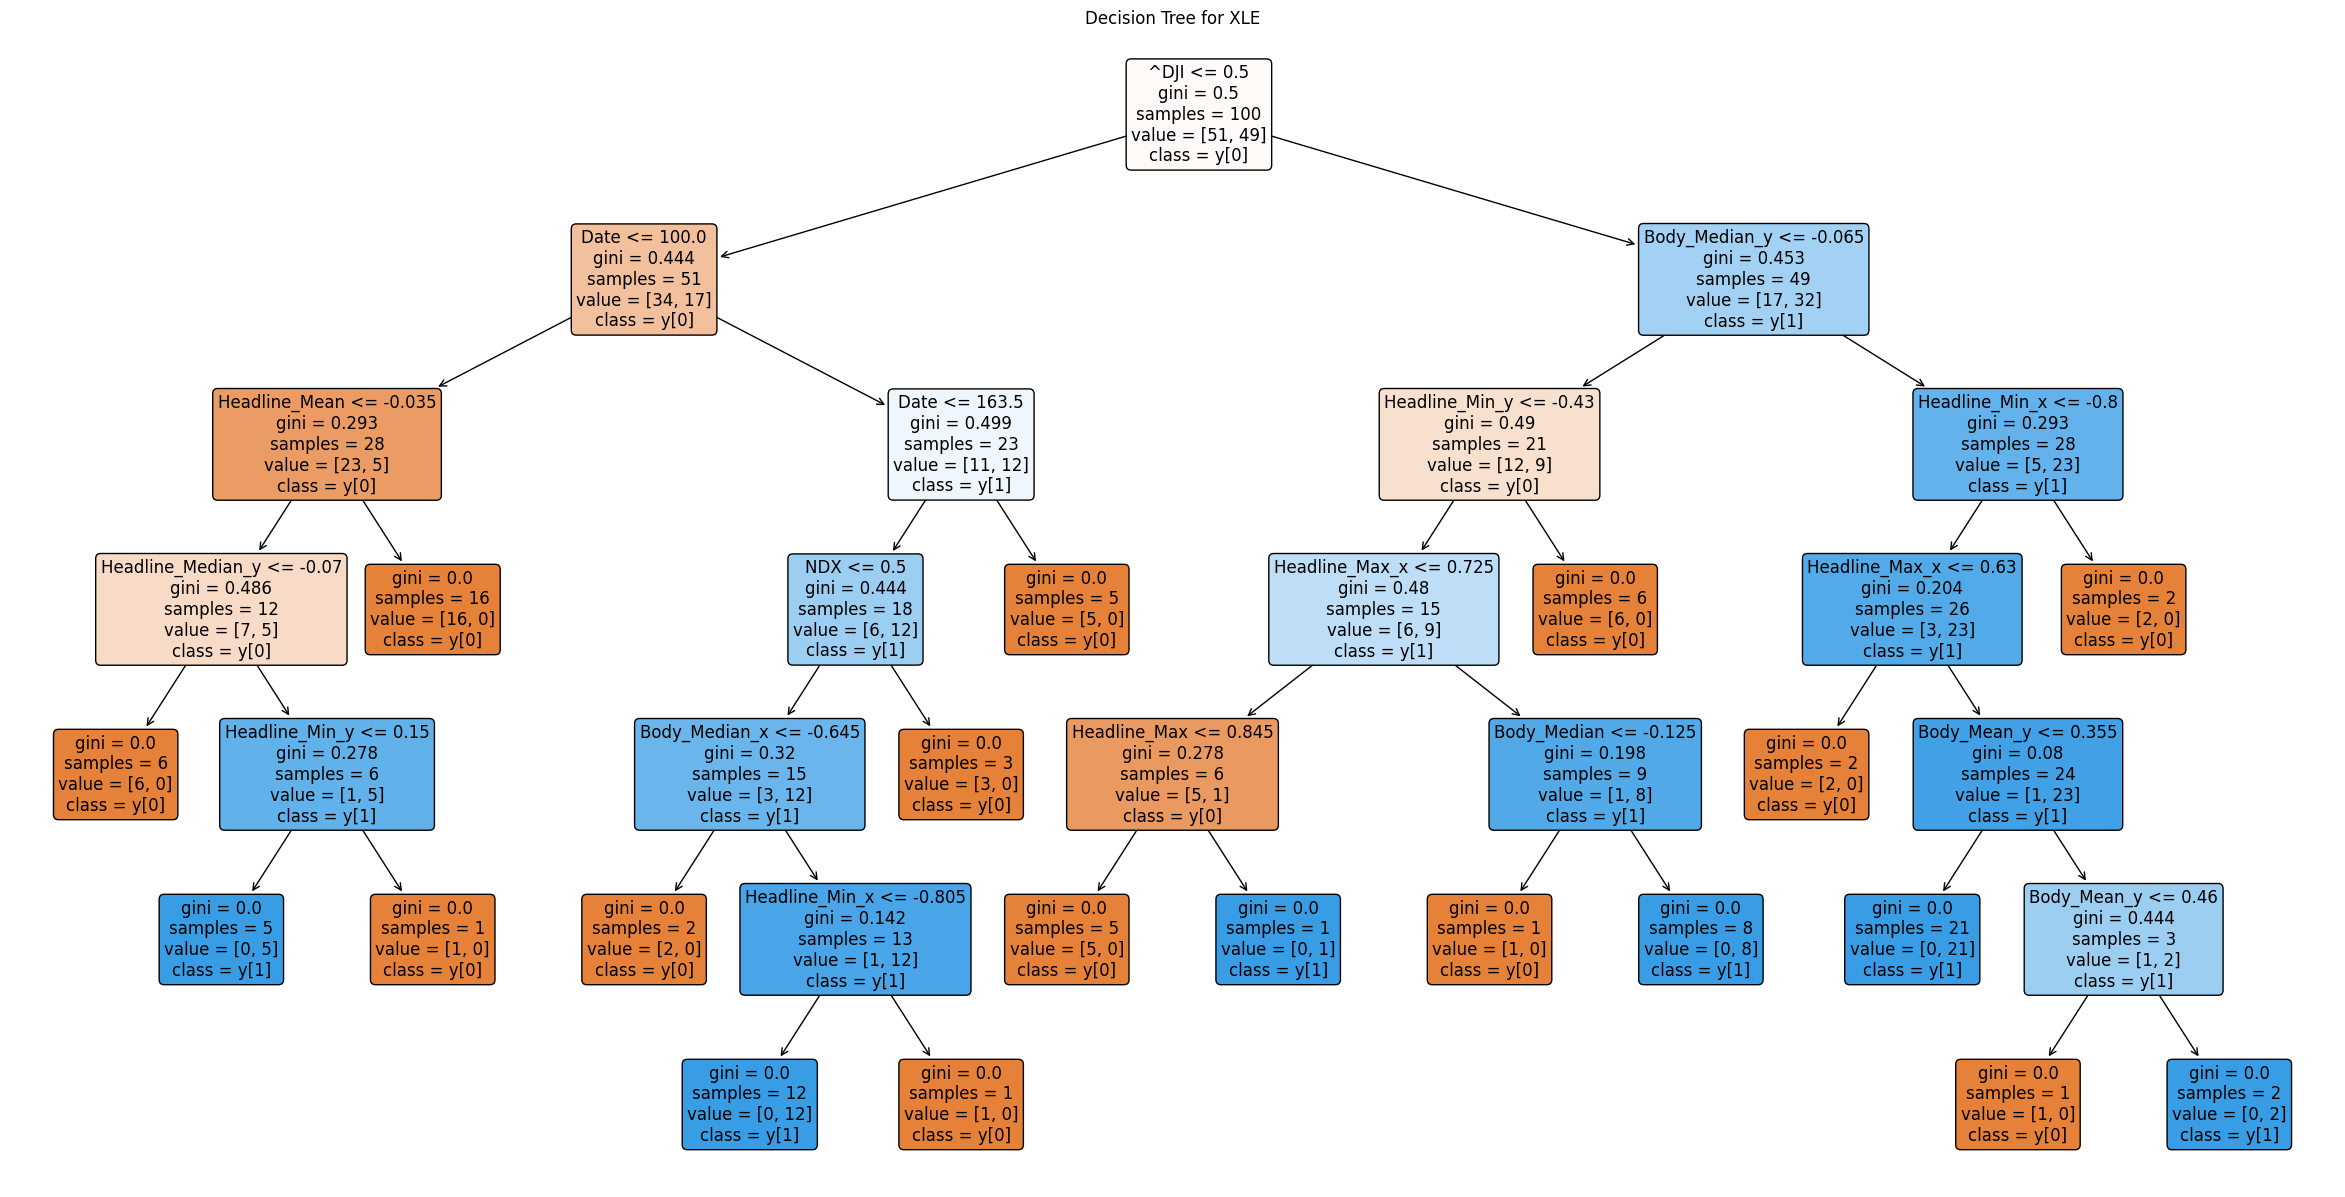

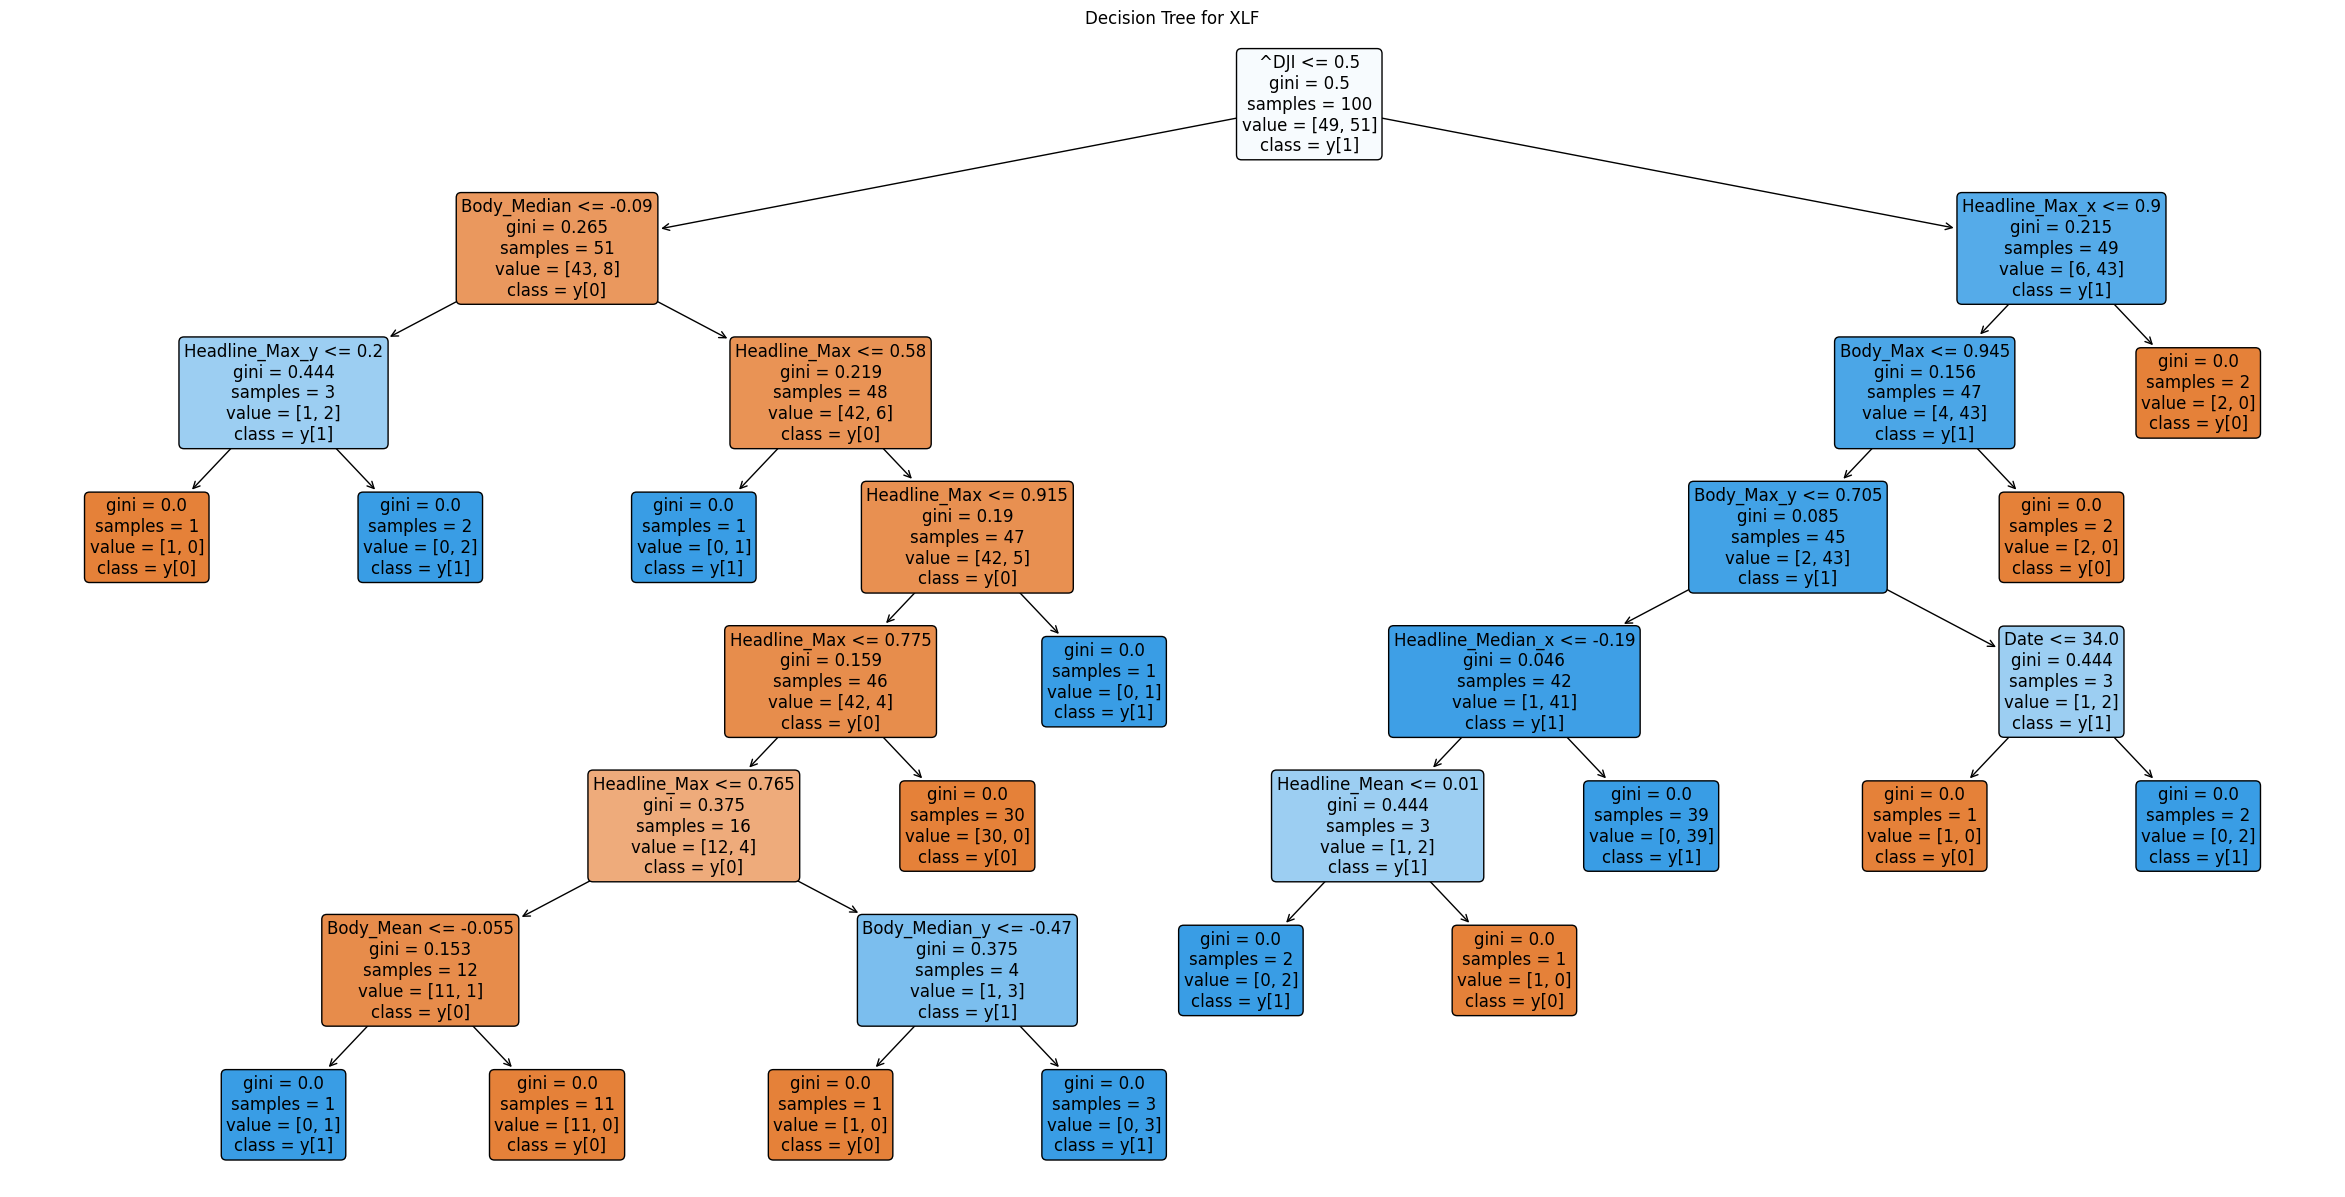

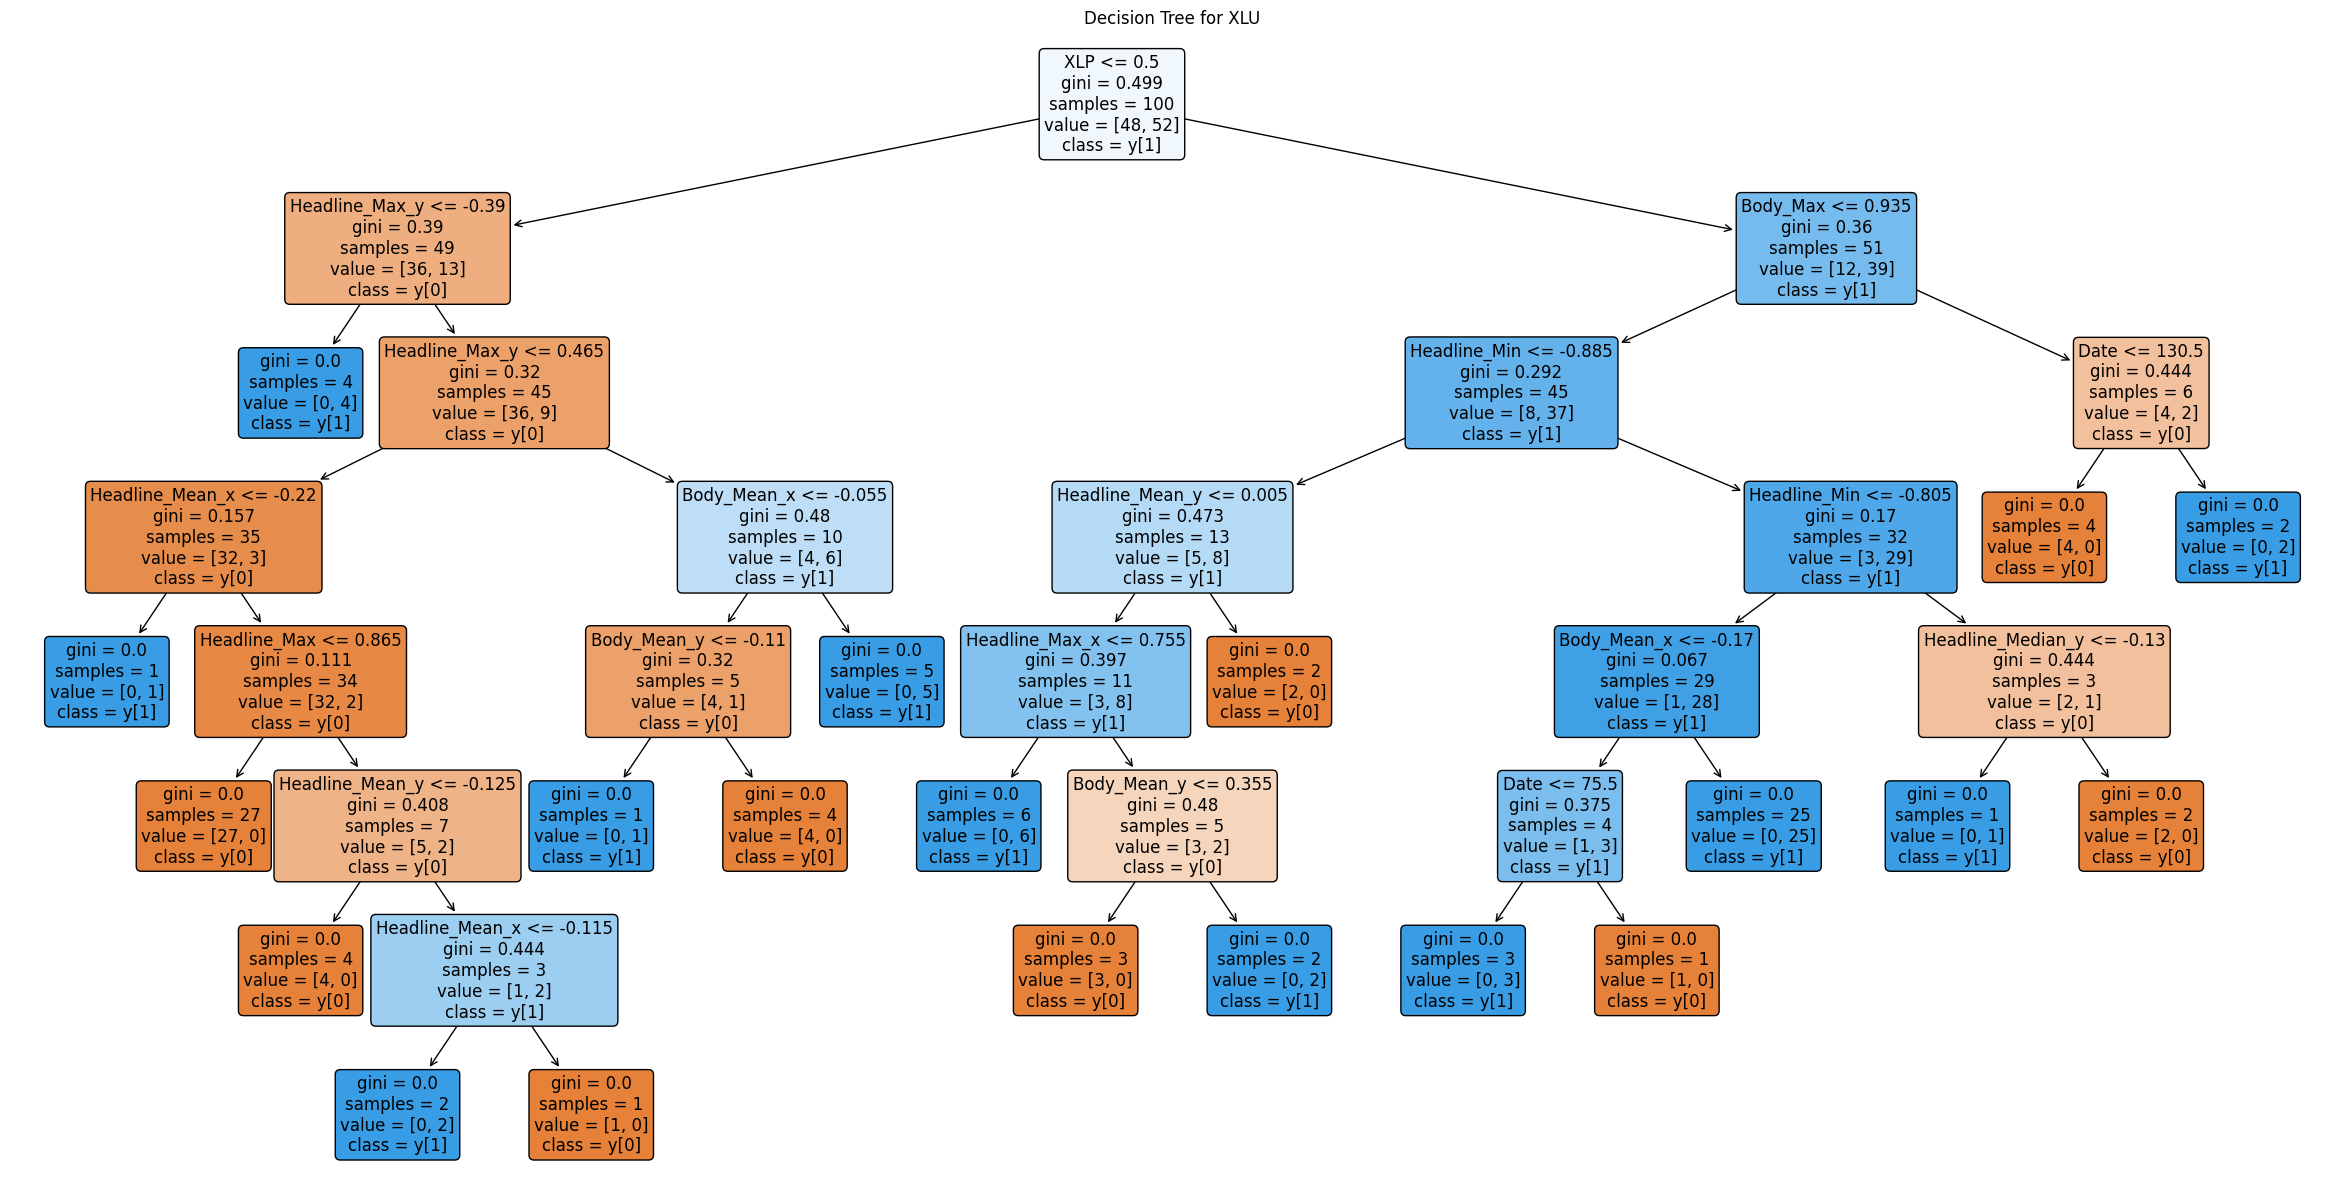

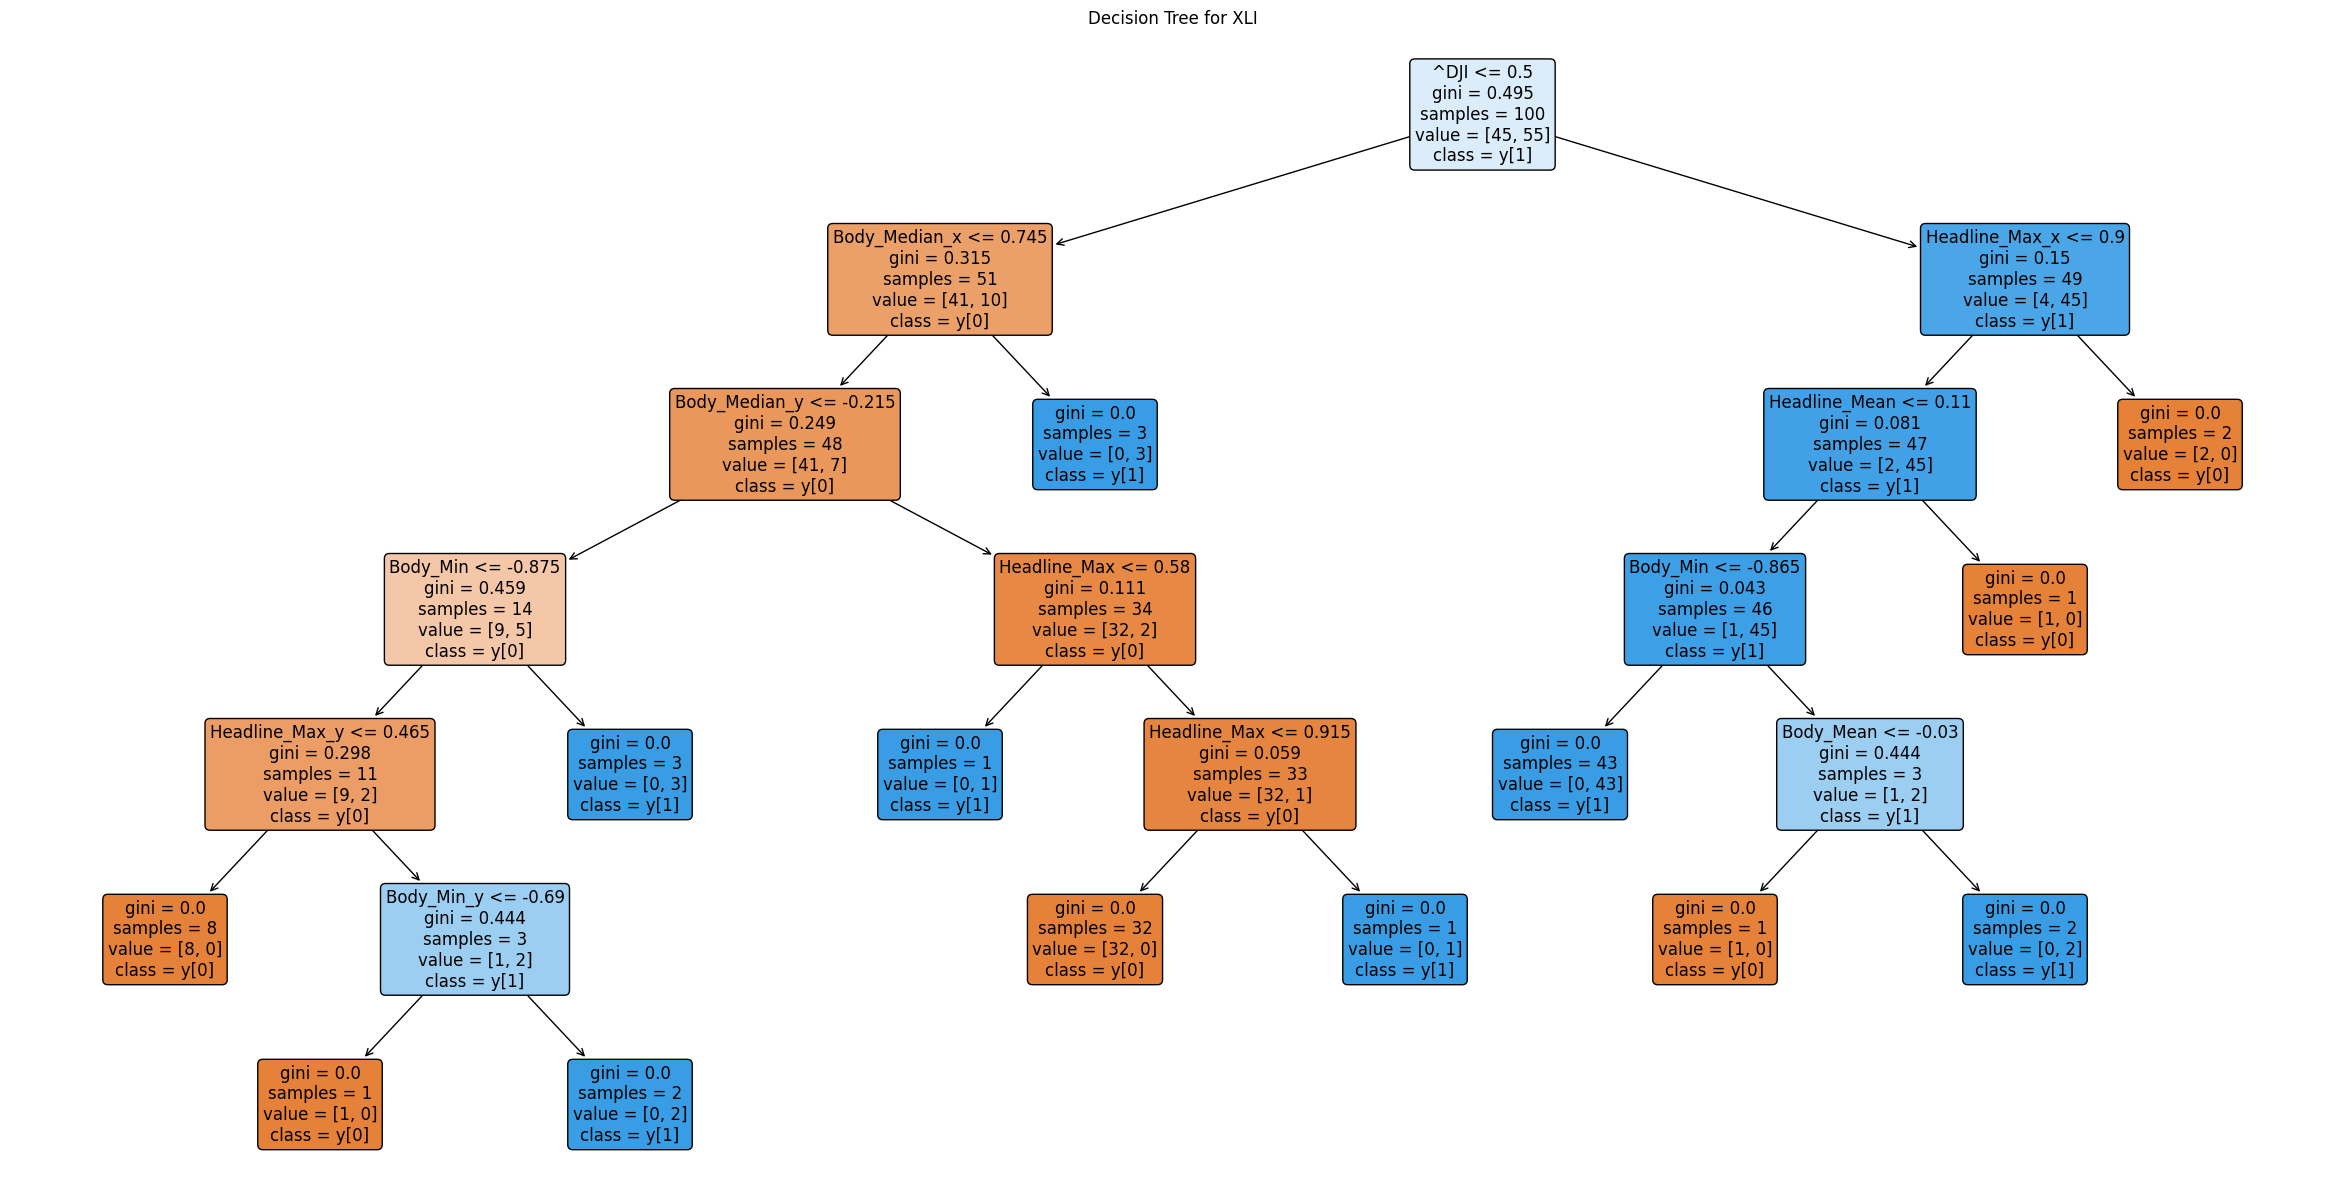

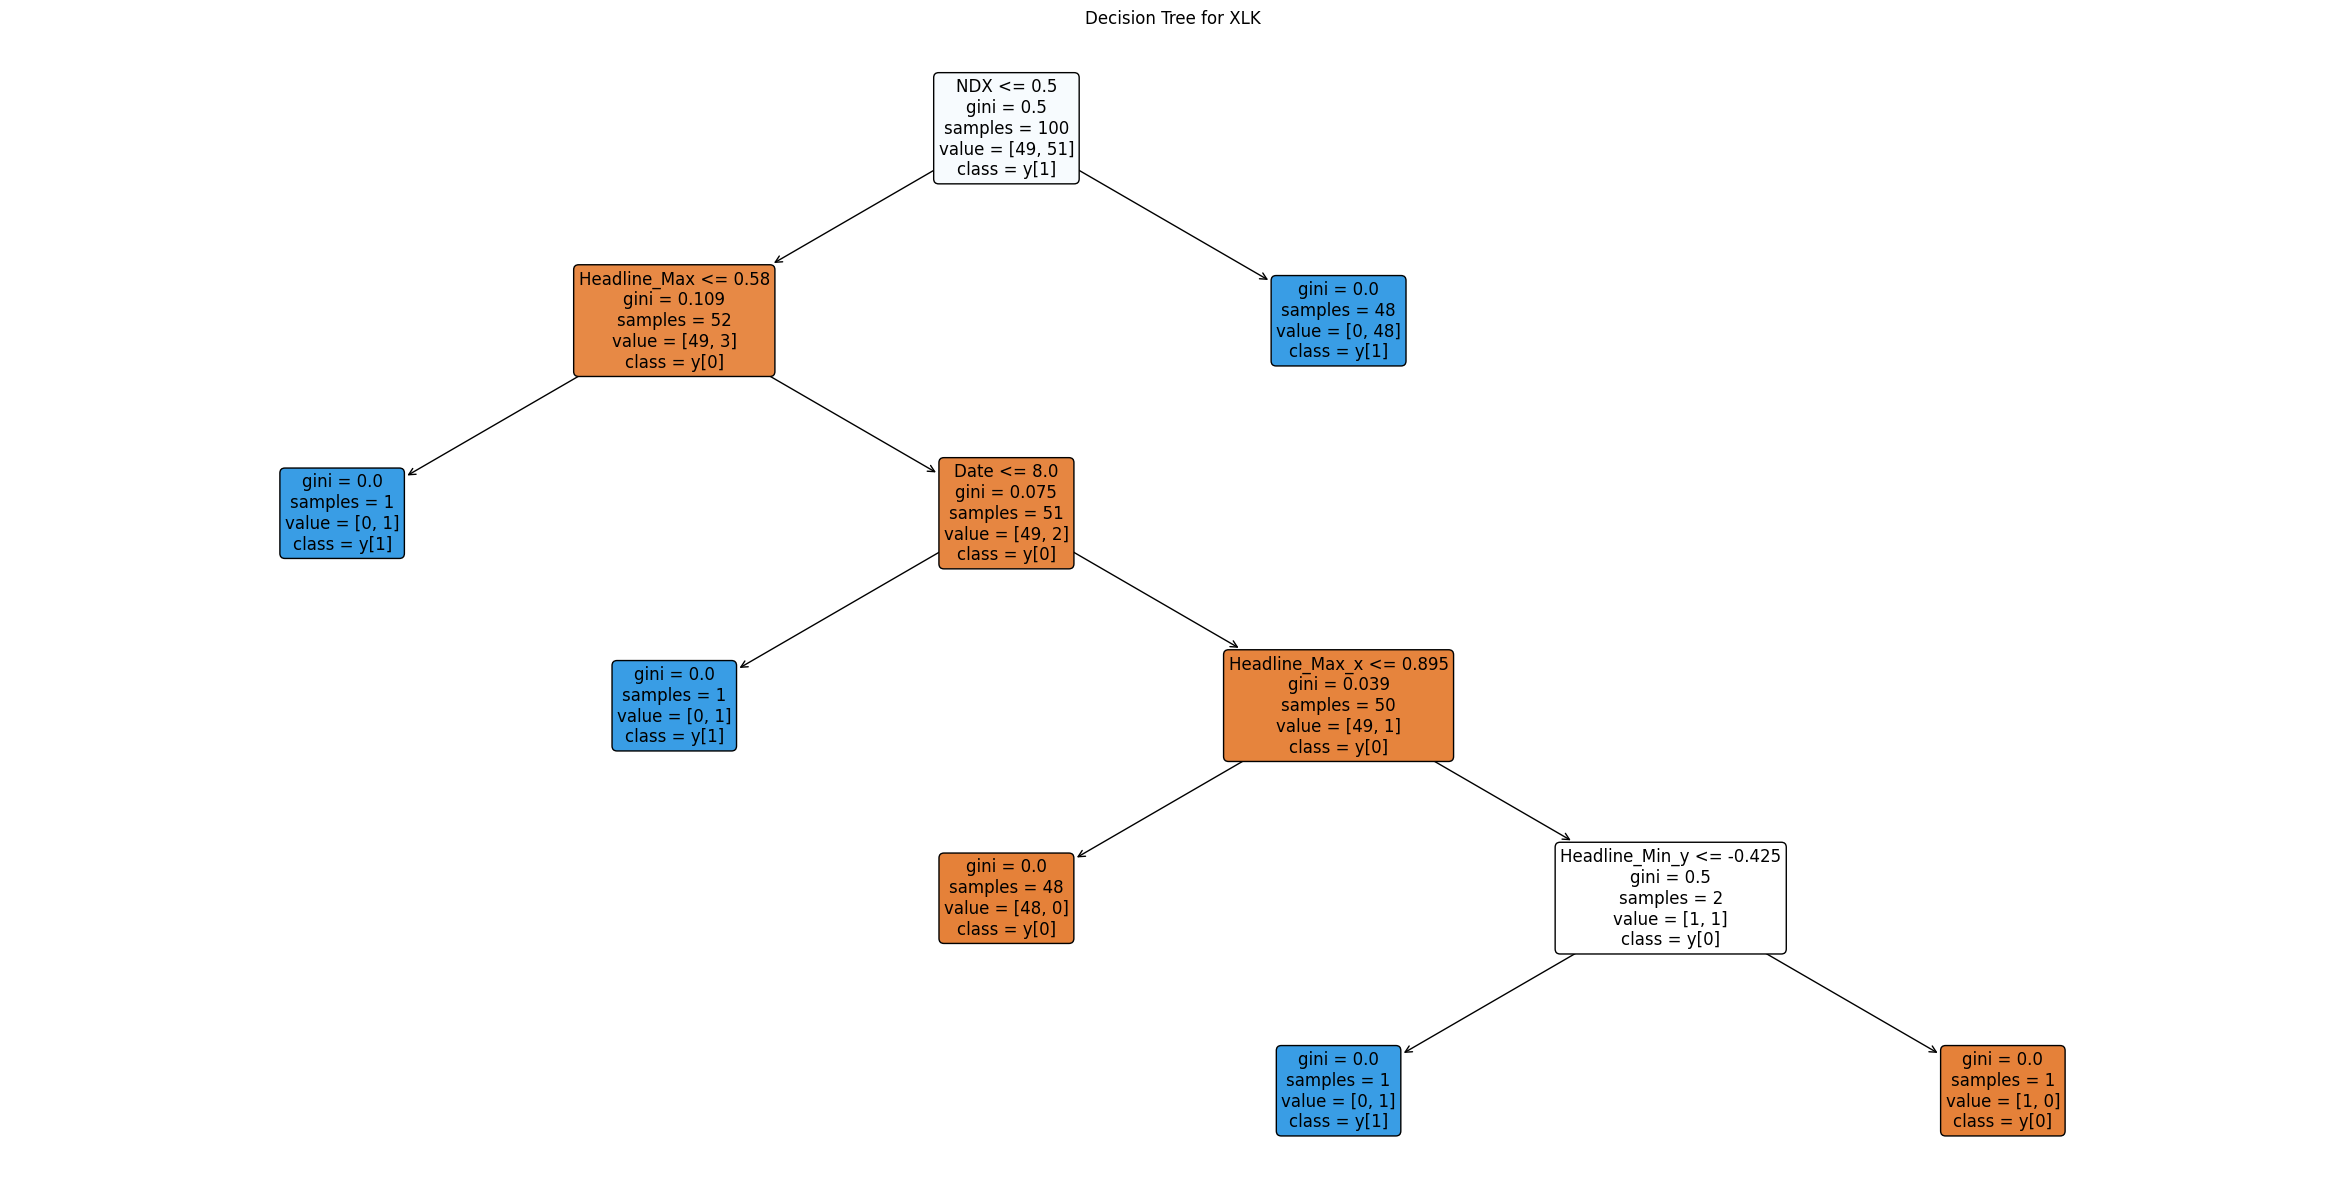

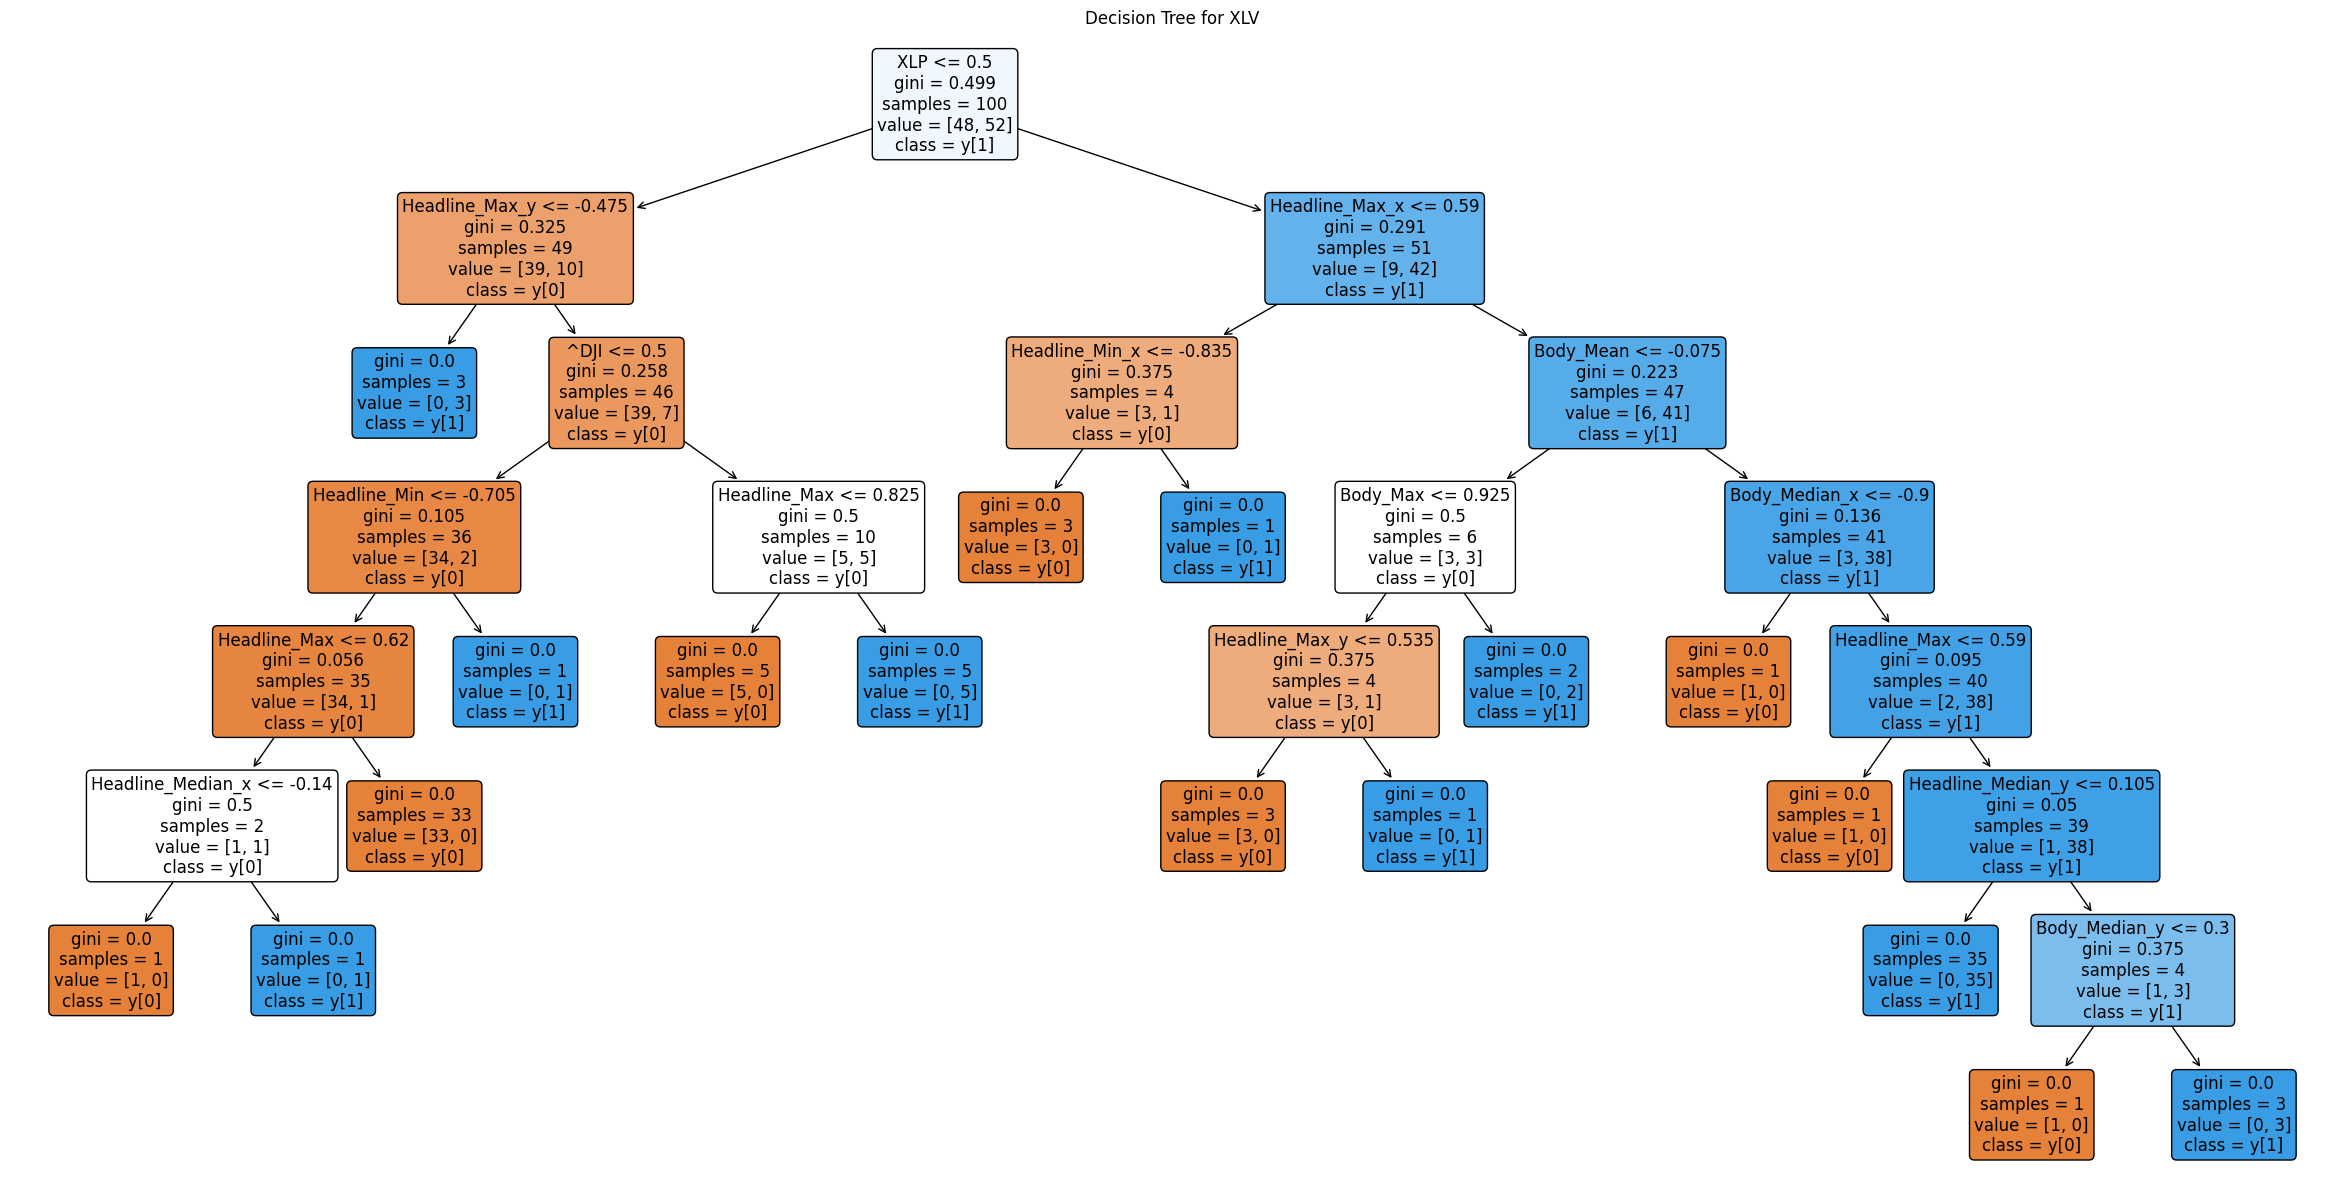

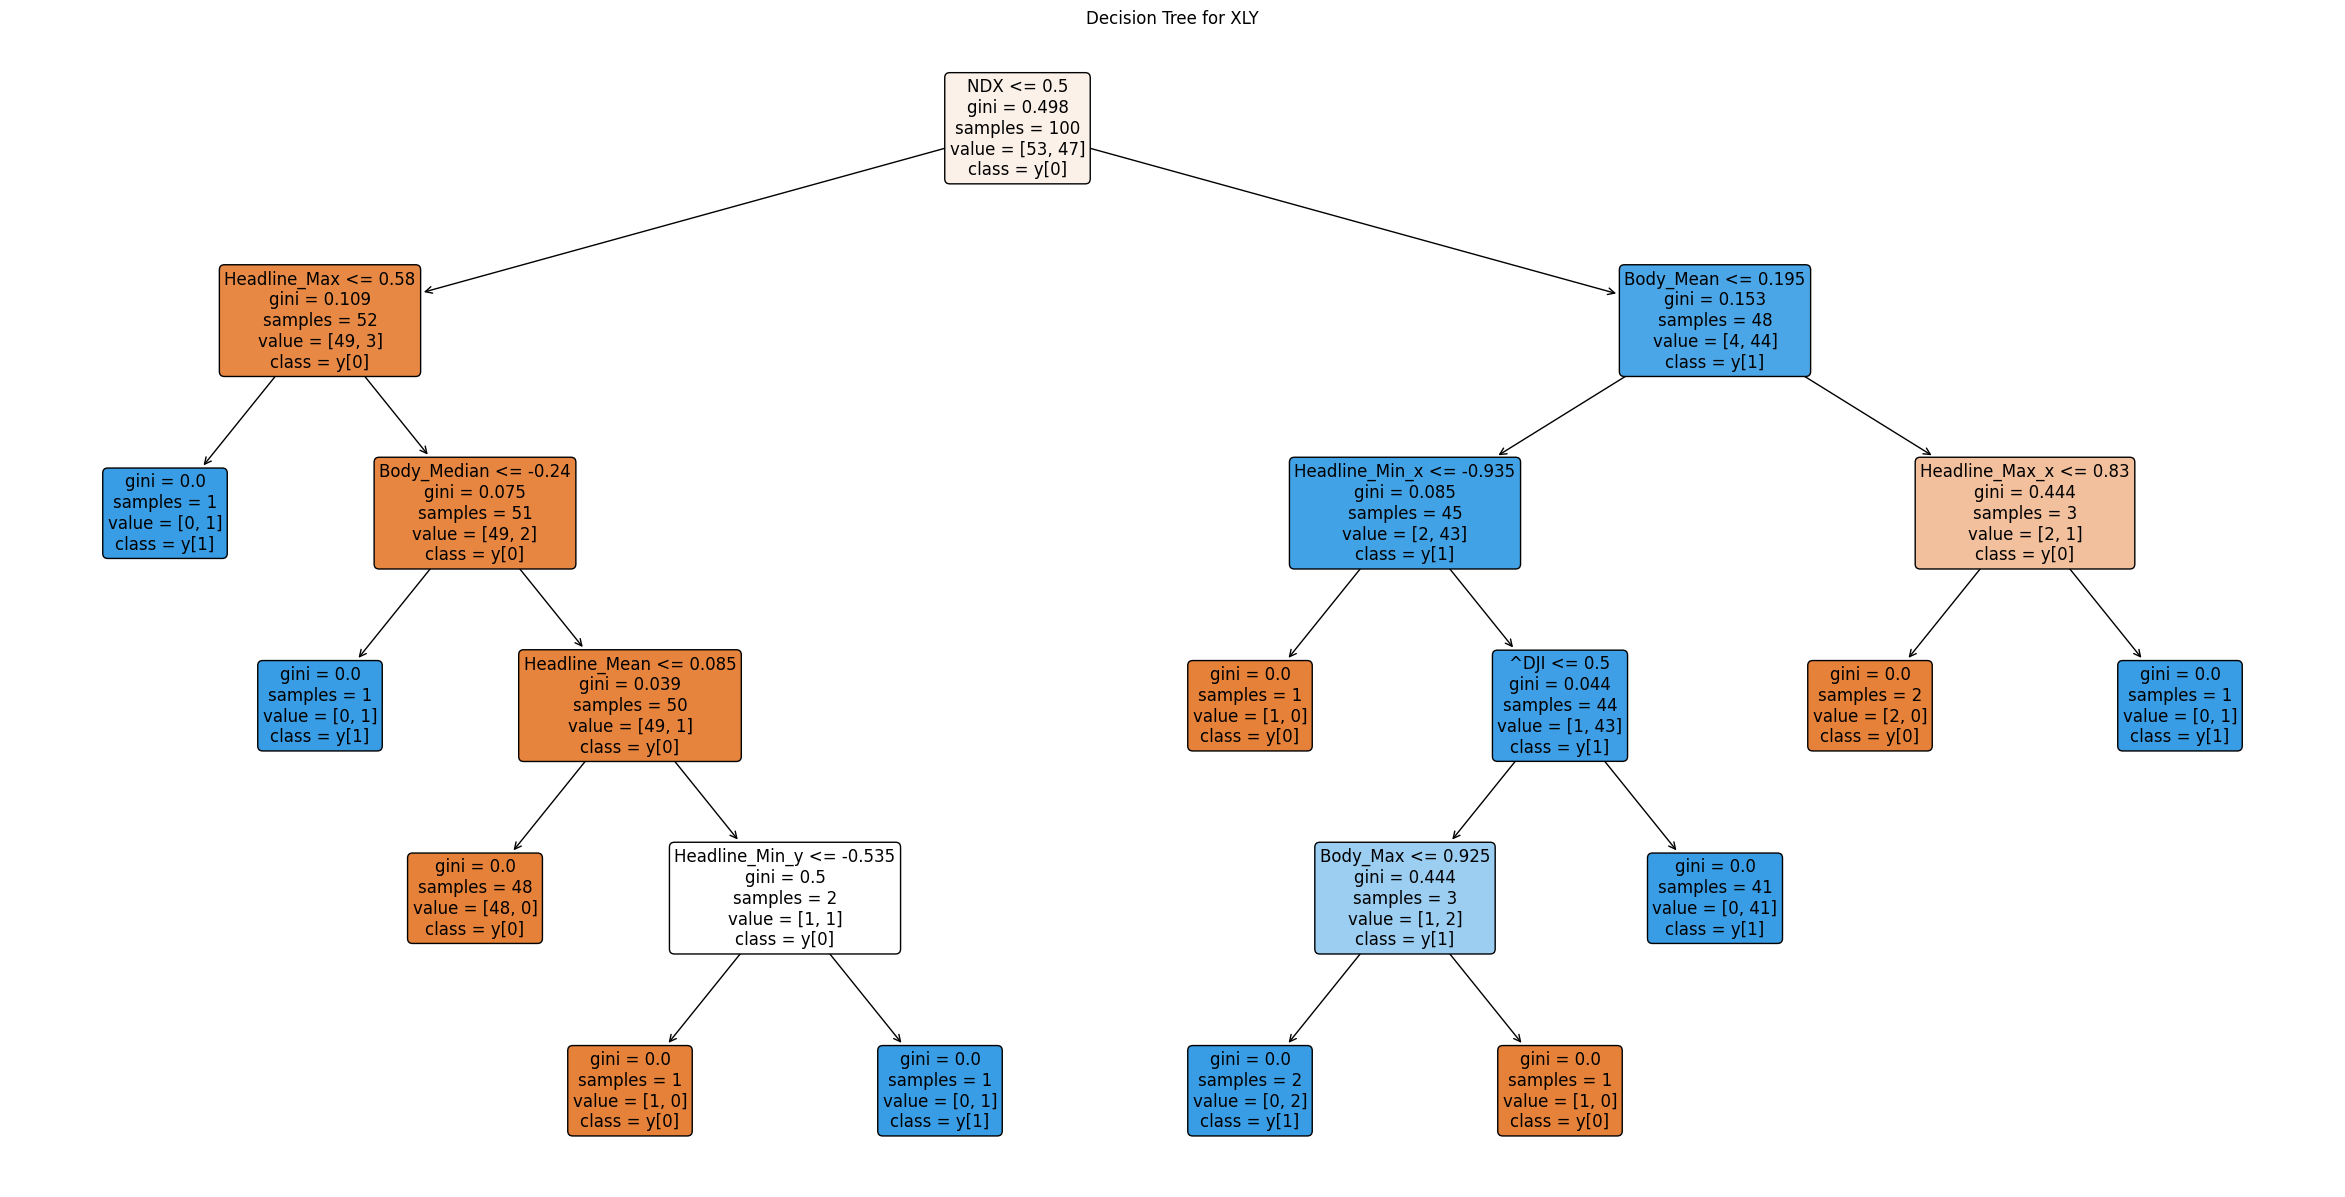

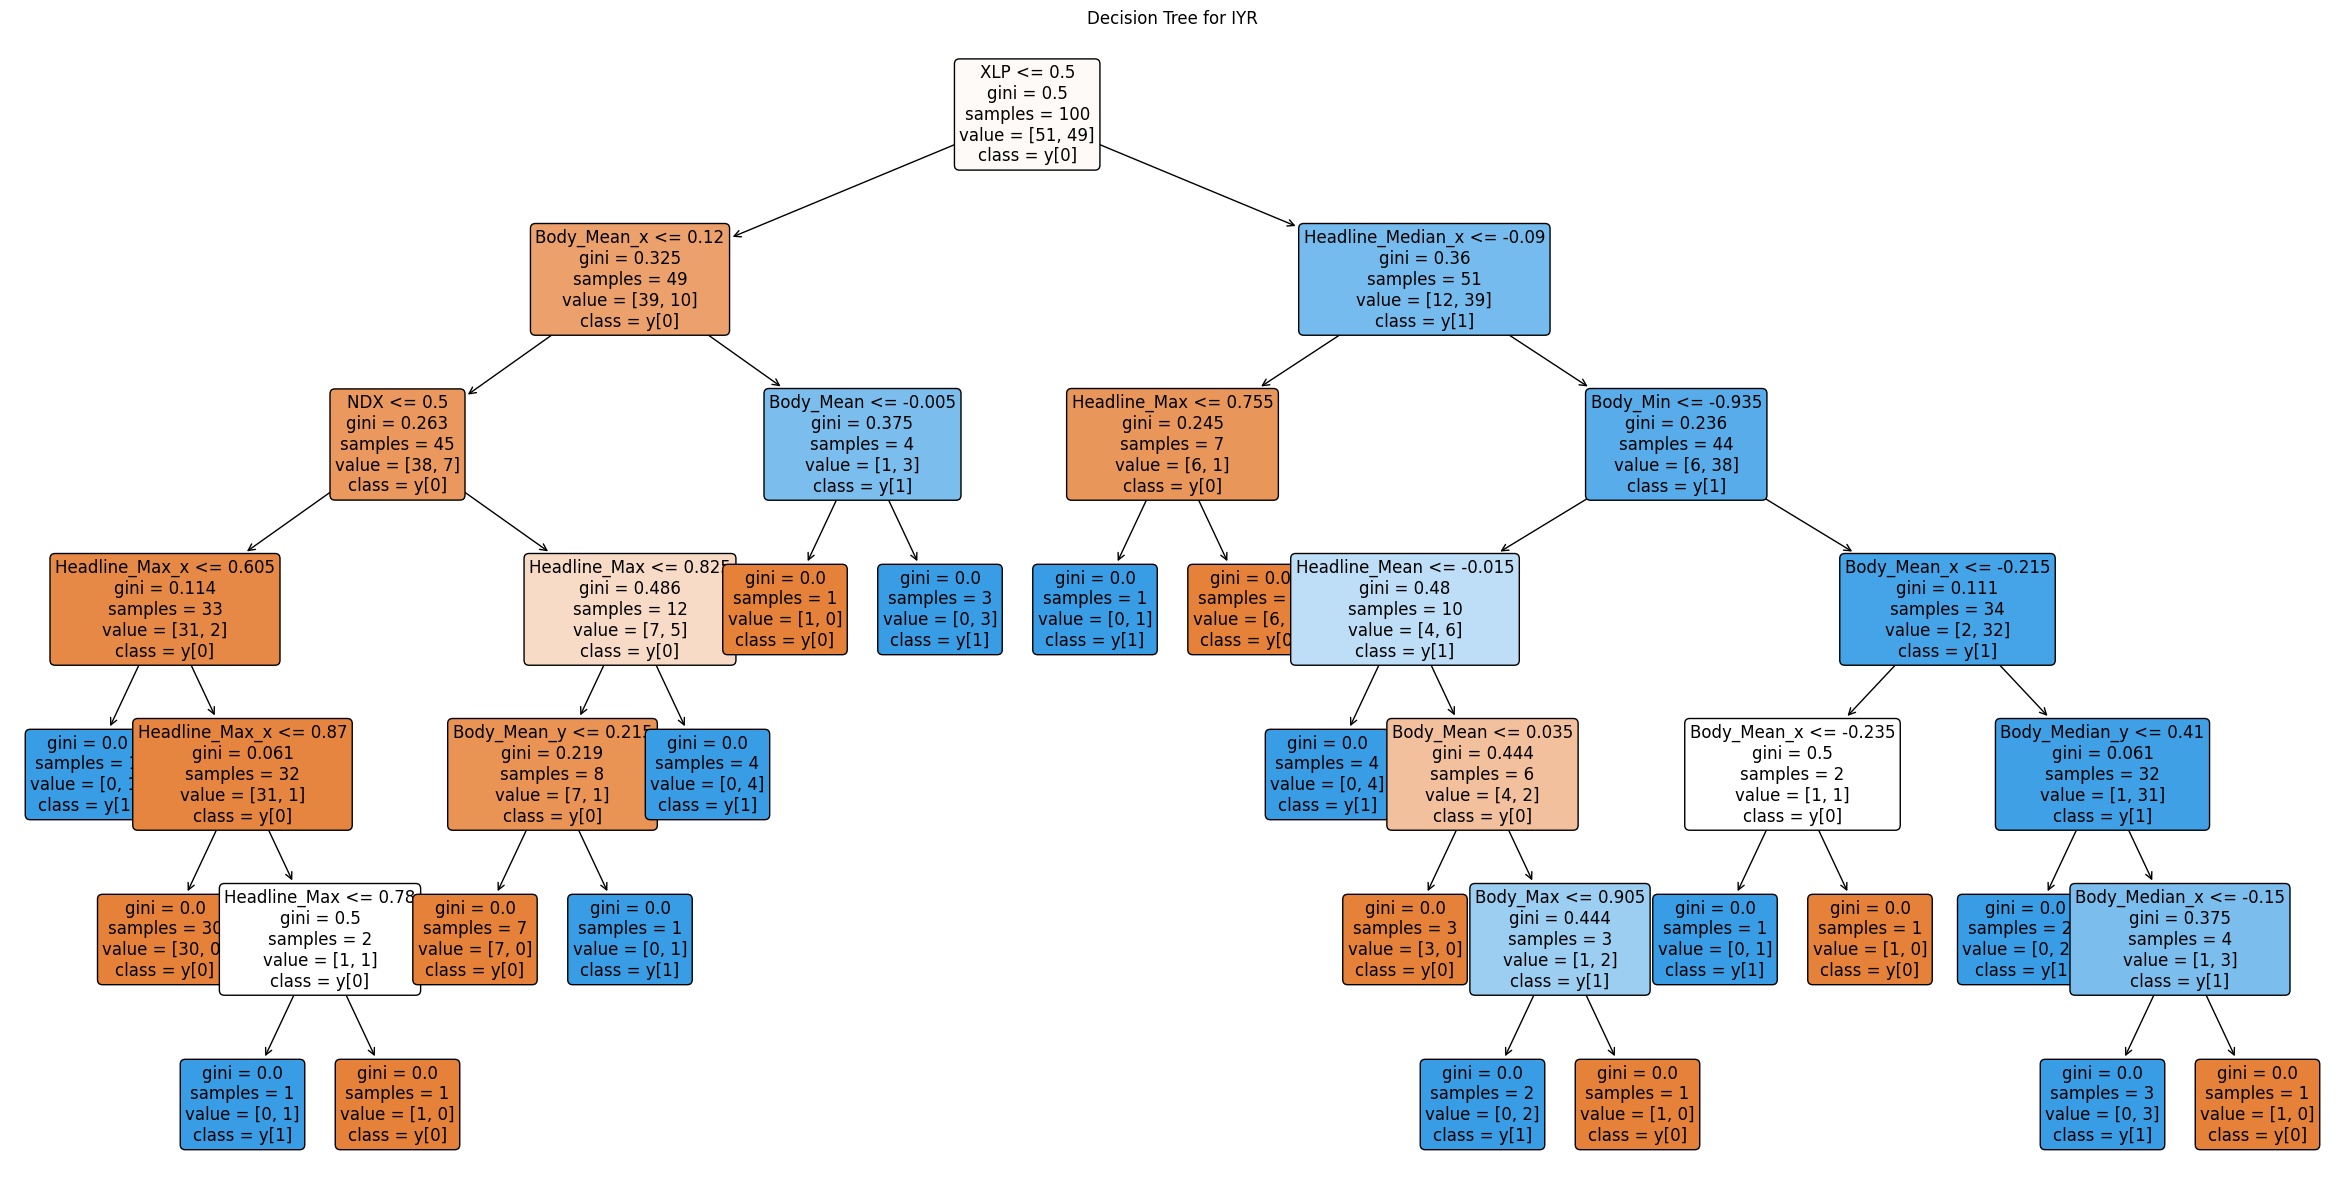

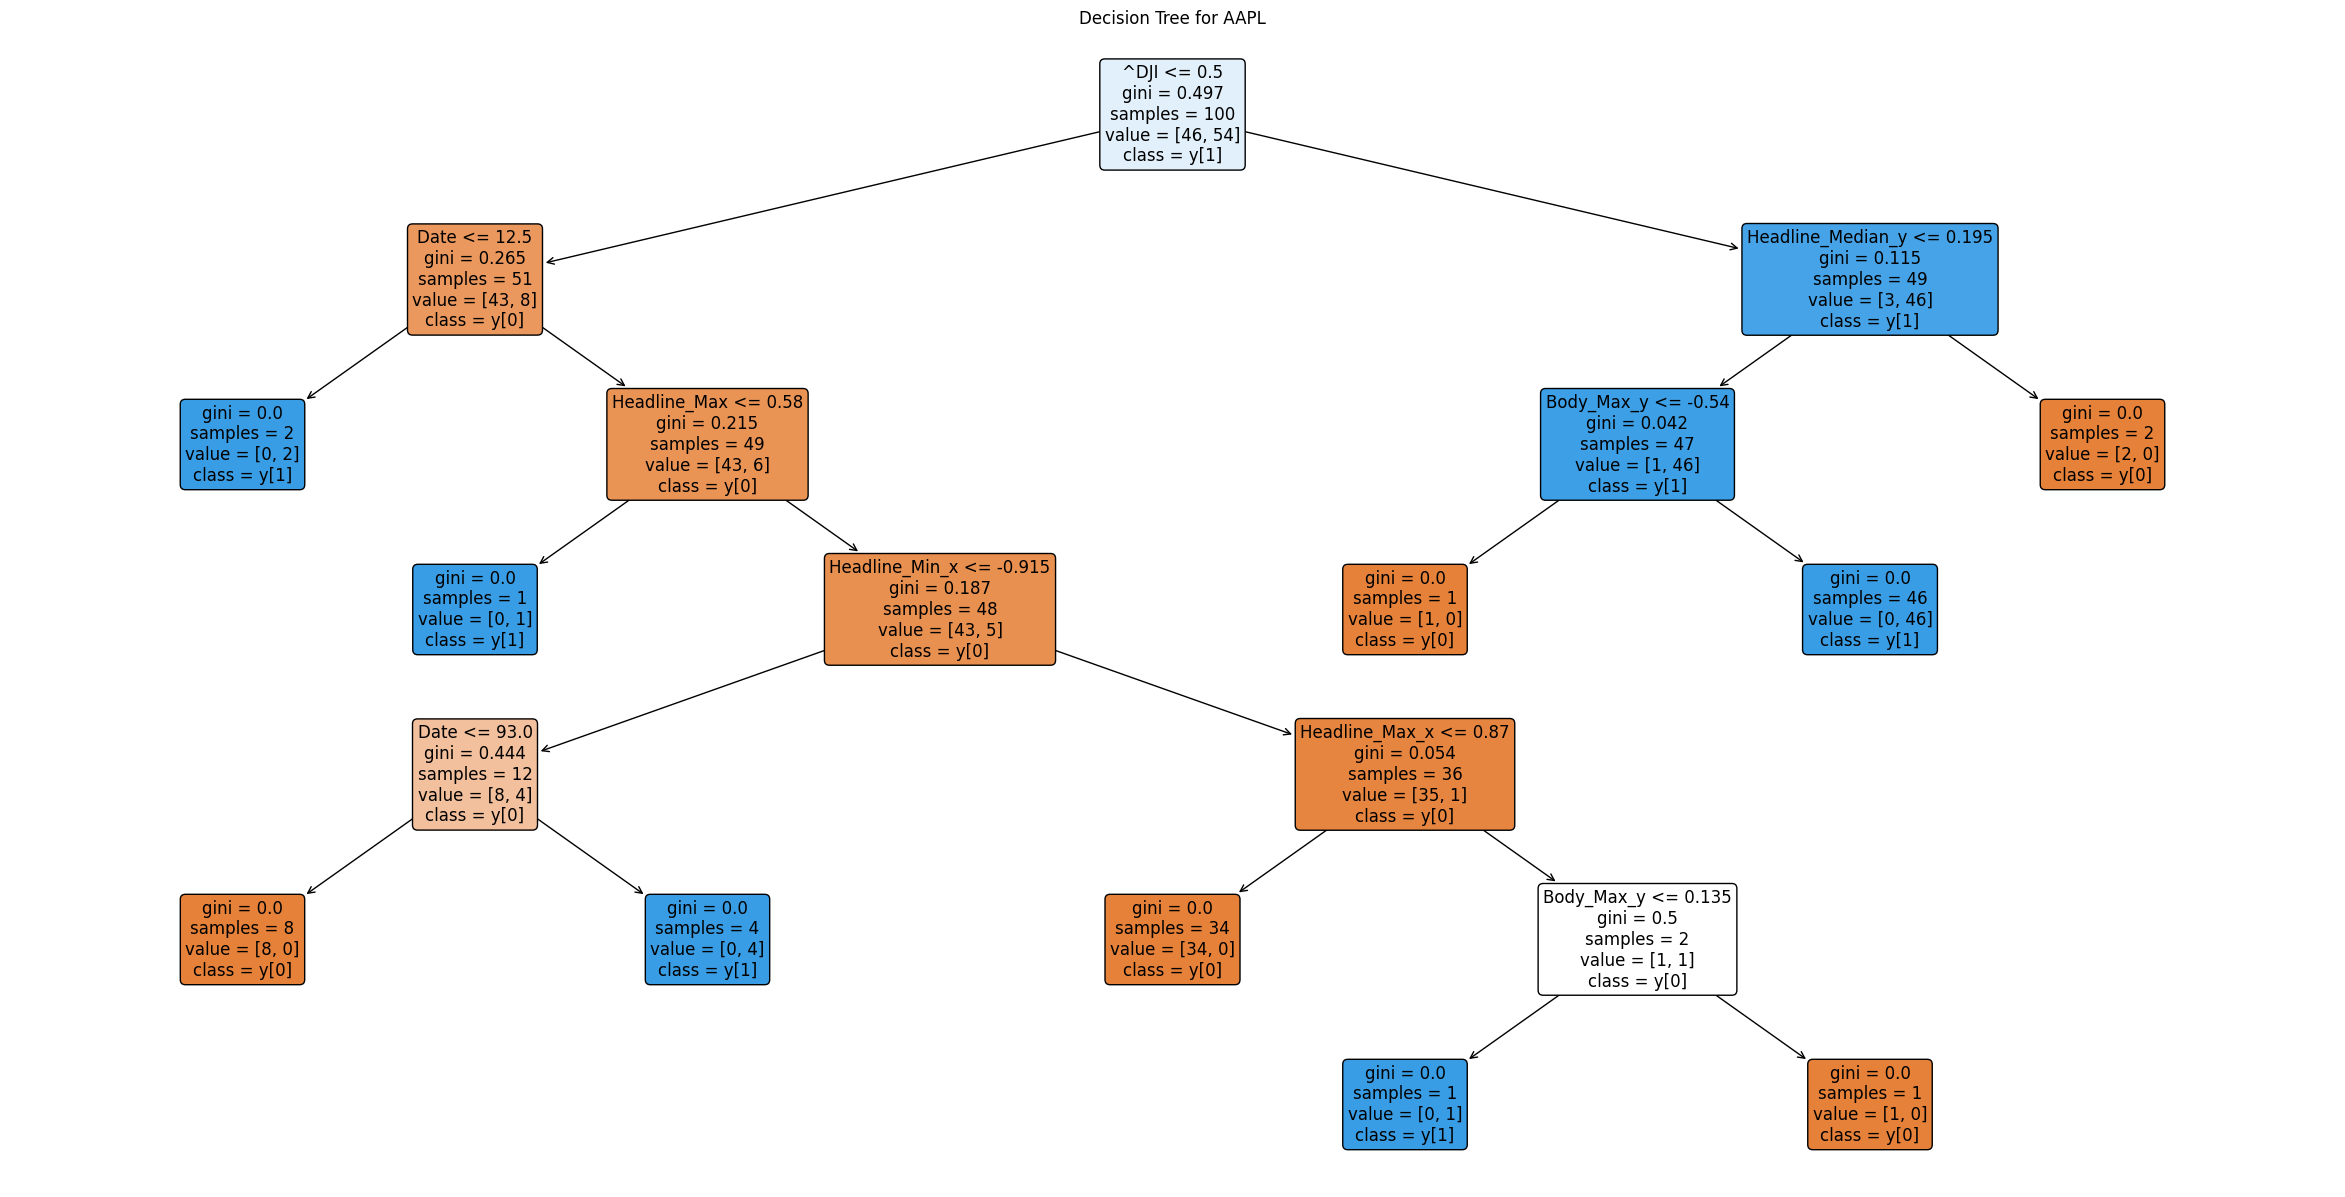

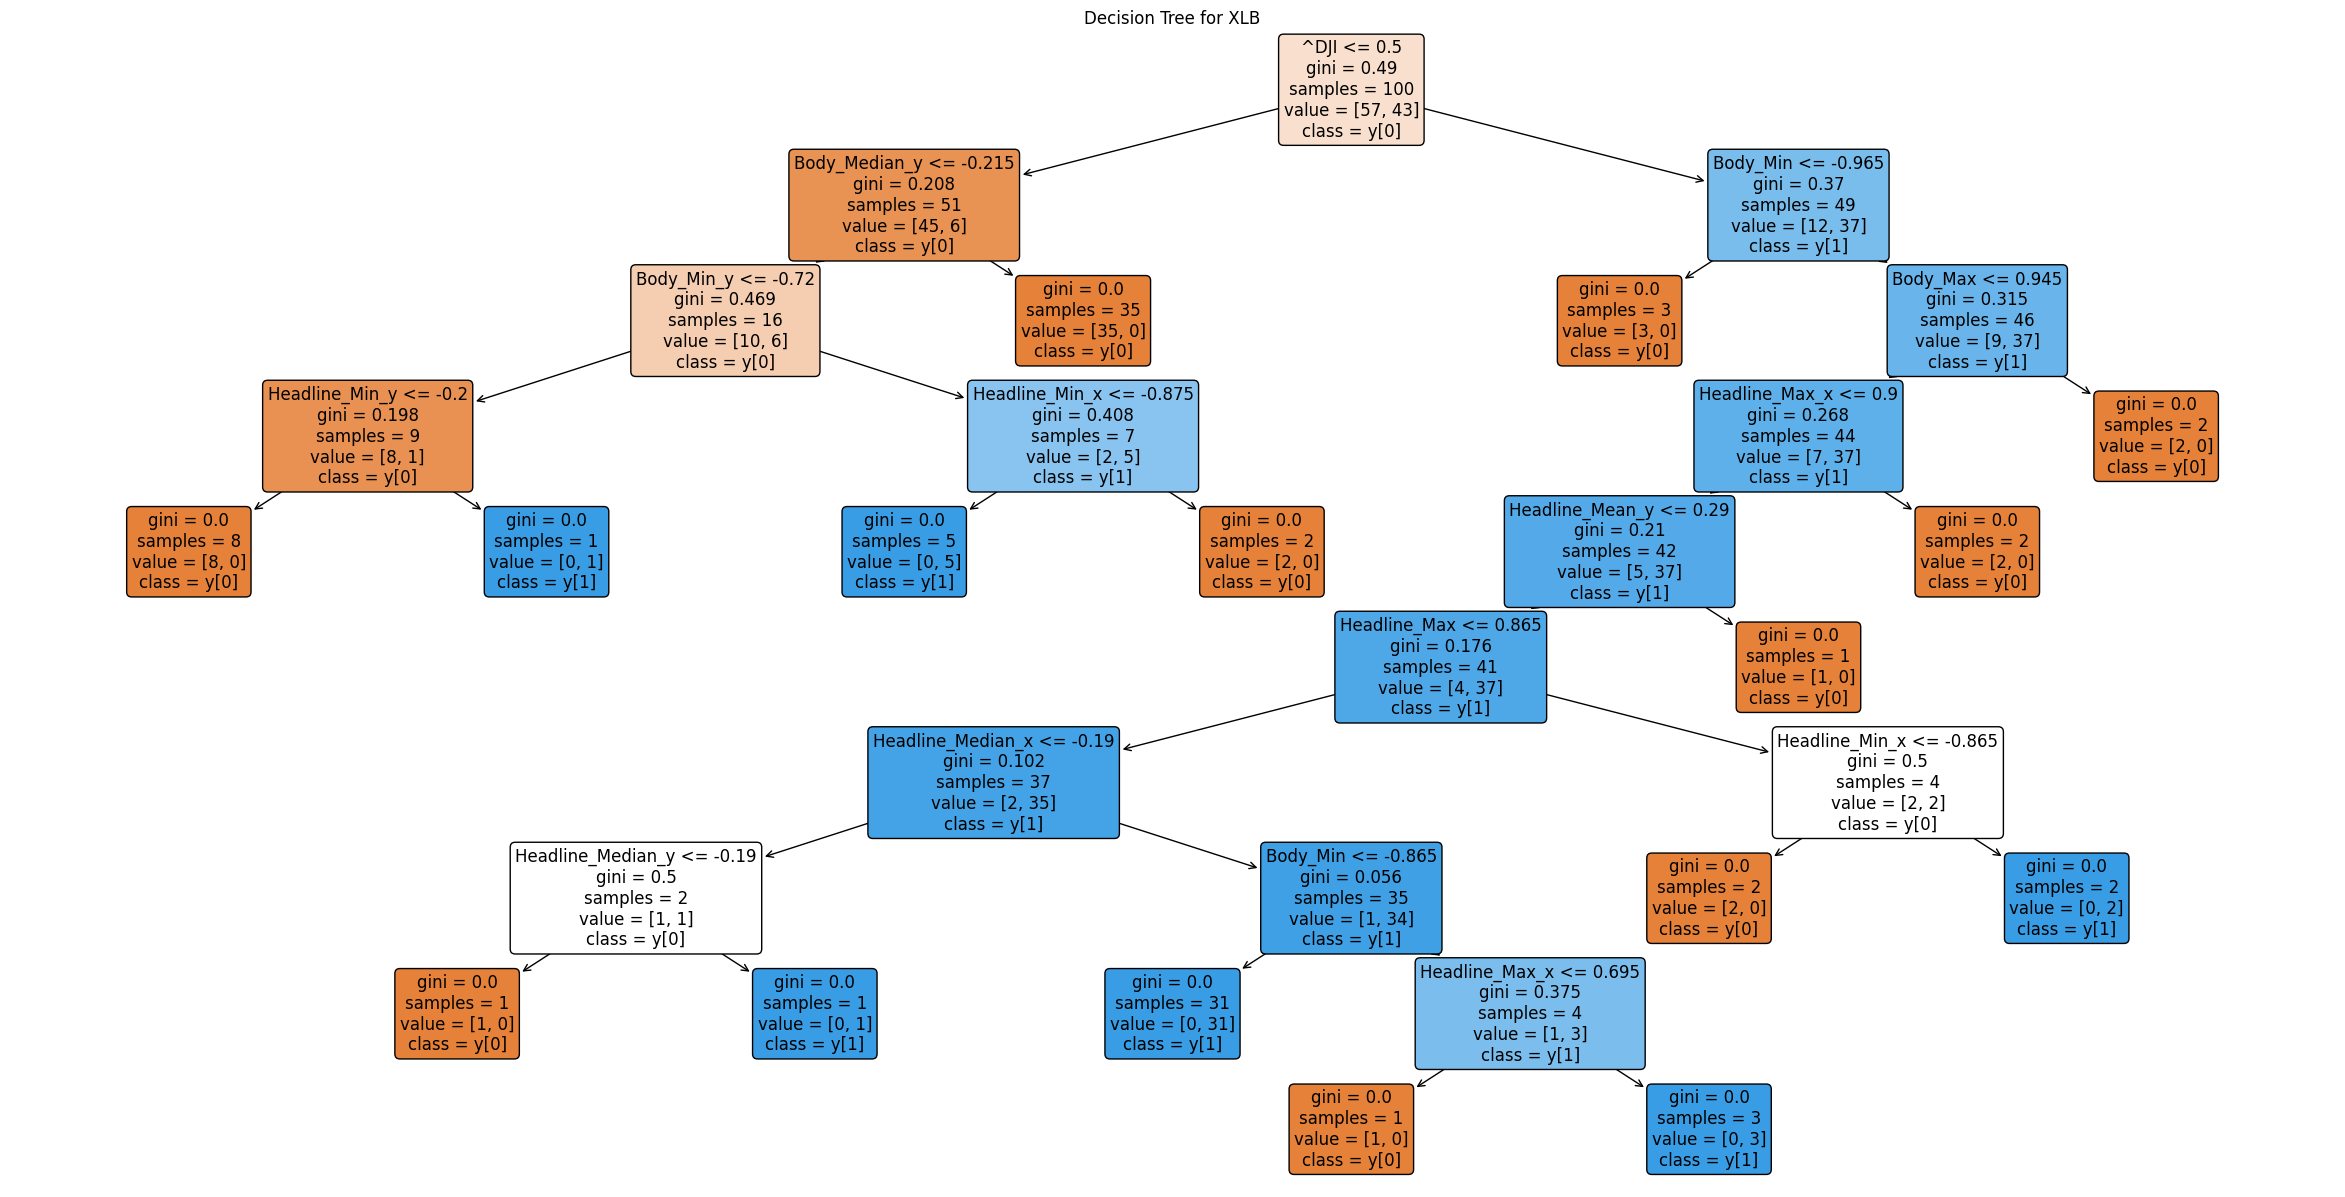

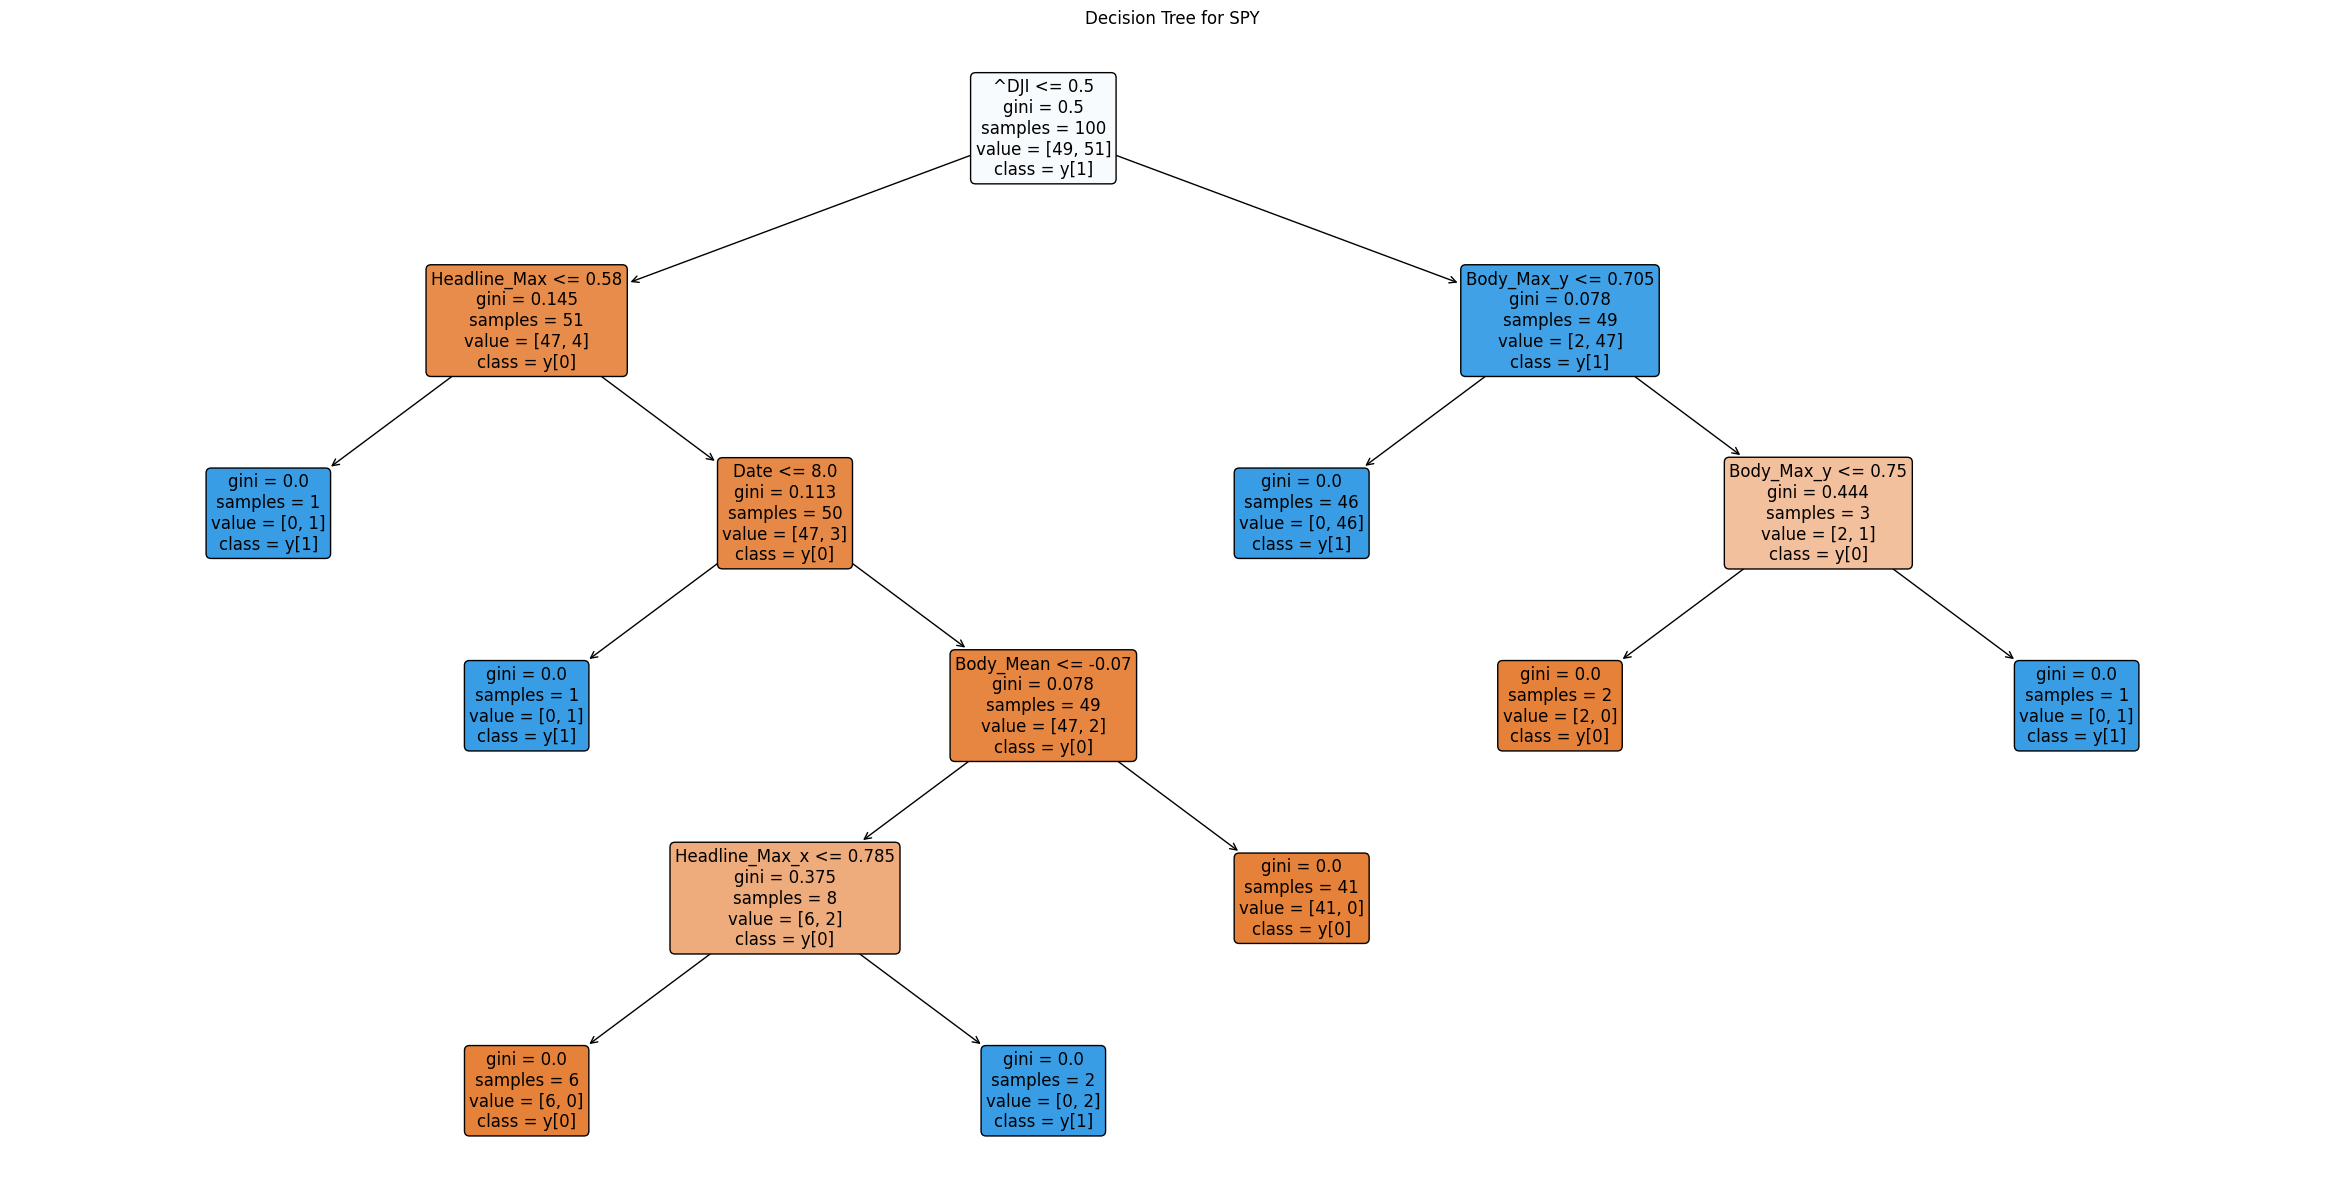

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.multioutput import MultiOutputClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Convert the 'Date' column to the number of days since '2022-03-14'
reference_date = pd.Timestamp('2022-03-14')
daily_stock_mixed_news['Date'] = (pd.to_datetime(daily_stock_mixed_news['Date']) - reference_date).dt.days

# Define the list of target columns
target_columns = ['XLE', 'XLF', 'XLU', 'XLI', 'XLK', 'XLV', 'XLY', 'IYR', 'AAPL', 'XLB', 'SPY']

# Select the features and target columns
X = daily_stock_mixed_news.drop(target_columns, axis=1)
y = daily_stock_mixed_news[target_columns]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the multi-output decision tree classifier
base_classifier = DecisionTreeClassifier(random_state=42)
multi_output_clf = MultiOutputClassifier(base_classifier)
multi_output_clf.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = multi_output_clf.predict(X_test)

# Evaluate the model for each target column
for idx, target_col in enumerate(target_columns):
    accuracy = accuracy_score(y_test.iloc[:, idx], y_pred[:, idx])
    print(f"Accuracy for {target_col}: {accuracy:.2f}")
    print("\nClassification Report:")
    print(classification_report(y_test.iloc[:, idx], y_pred[:, idx]))

# Visualize each decision tree
for idx, (target_col, estimator) in enumerate(zip(target_columns, multi_output_clf.estimators_)):
    plt.figure(figsize=(30, 15))
    plot_tree(estimator, feature_names=X.columns, class_names=True, filled=True, rounded=True, fontsize=12)
    plt.title(f"Decision Tree for {target_col}")
    plt.savefig(f"decision_tree_{target_col}.png")  # Save the tree as an image file
    plt.show()    

These results suggest that the multi-output decision tree classifier performs relatively well on certain stock indicators (e.g., XLI and XLK), while it struggles more with others (e.g., XLU and IYR). You may consider fine-tuning the model or exploring other machine learning techniques to improve the overall performance across all indicators.